In [10]:
bucket = 's3://pakplants/'
data_key = ''
data_location = 's3://{}/{}'.format(bucket,data_key)

In [11]:
#  Check bucket size
!aws s3 ls s3://pakplants/ --recursive --human-readable --summarize

2022-02-25 08:56:17    1.5 MiB Alstonia_Scholaris/0003_0001.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0002.JPG
2022-02-25 08:56:17    1.7 MiB Alstonia_Scholaris/0003_0003.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0004.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0005.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0006.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0007.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0008.JPG
2022-02-25 08:56:17    1.5 MiB Alstonia_Scholaris/0003_0009.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0010.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0011.JPG
2022-02-25 08:56:17    1.5 MiB Alstonia_Scholaris/0003_0012.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0013.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0014.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_Scholaris/0003_0015.JPG
2022-02-25 08:56:17    1.6 MiB Alstonia_

In [12]:
# import dataset from s3 bucket
import boto3 
import os
from botocore.exceptions import ClientError # Not necessary


s3 = boto3.resource('s3', region_name='ap-south-1') 

bucket = s3.Bucket('pakplants')
for my_bucket_object in bucket.objects.all():    
    key = my_bucket_object.key    
    print(key)    
    if not os.path.exists(os.path.dirname(key)):           
        os.makedirs(os.path.dirname(key))
   
    try:         
        bucket.download_file(key, key)     
    except ClientError as e:         
        if e.response['Error']['Code'] == "404":             
            print("No object with this key.")        
        else:             
            raise

Alstonia_Scholaris/0003_0001.JPG
Alstonia_Scholaris/0003_0002.JPG
Alstonia_Scholaris/0003_0003.JPG
Alstonia_Scholaris/0003_0004.JPG
Alstonia_Scholaris/0003_0005.JPG
Alstonia_Scholaris/0003_0006.JPG
Alstonia_Scholaris/0003_0007.JPG
Alstonia_Scholaris/0003_0008.JPG
Alstonia_Scholaris/0003_0009.JPG
Alstonia_Scholaris/0003_0010.JPG
Alstonia_Scholaris/0003_0011.JPG
Alstonia_Scholaris/0003_0012.JPG
Alstonia_Scholaris/0003_0013.JPG
Alstonia_Scholaris/0003_0014.JPG
Alstonia_Scholaris/0003_0015.JPG
Alstonia_Scholaris/0003_0016.JPG
Alstonia_Scholaris/0003_0017.JPG
Alstonia_Scholaris/0003_0018.JPG
Alstonia_Scholaris/0003_0019.JPG
Alstonia_Scholaris/0003_0020.JPG
Alstonia_Scholaris/0003_0021.JPG
Alstonia_Scholaris/0003_0022.JPG
Alstonia_Scholaris/0003_0023.JPG
Alstonia_Scholaris/0003_0024.JPG
Alstonia_Scholaris/0003_0025.JPG
Alstonia_Scholaris/0003_0026.JPG
Alstonia_Scholaris/0003_0027.JPG
Alstonia_Scholaris/0003_0028.JPG
Alstonia_Scholaris/0003_0029.JPG
Alstonia_Scholaris/0003_0030.JPG
Alstonia_S

In [14]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [15]:
file_path = 'Pakplantsdata'

In [18]:
name_class = os.listdir(file_path)
name_class

['Cherry',
 'Jatropha',
 'Corn',
 'Basil',
 'Pomegranate',
 'Jamun',
 'Pepper',
 'Alstonia_Scholaris',
 'Grapevine',
 'Raspberry',
 'Blueberry',
 'Arjun',
 'Tomato',
 'Strawberry',
 'Bael',
 'Soybean',
 '.ipynb_checkpoints',
 'Lemon',
 'Apple',
 'Chinar',
 'Background_without_leaves',
 'Gauva',
 'Potato',
 'Pongamia_Pinnata',
 'Peach',
 'Grape',
 'Mango']

In [19]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [20]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

Filepath  \
0               Pakplantsdata/Jatropha/0018_0104.JPG   
1                 Pakplantsdata/Corn/image (633).jpg   
2               Pakplantsdata/Tomato/image (401).JPG   
3  Pakplantsdata/Background_without_leaves/image ...   
4           Pakplantsdata/Strawberry/image (789).JPG   

                       Label  
0                   Jatropha  
1                       Corn  
2                     Tomato  
3  Background_without_leaves  
4                 Strawberry

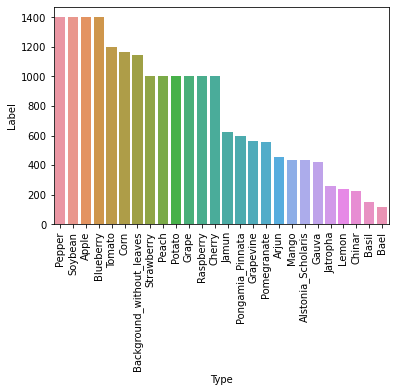

In [21]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [22]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

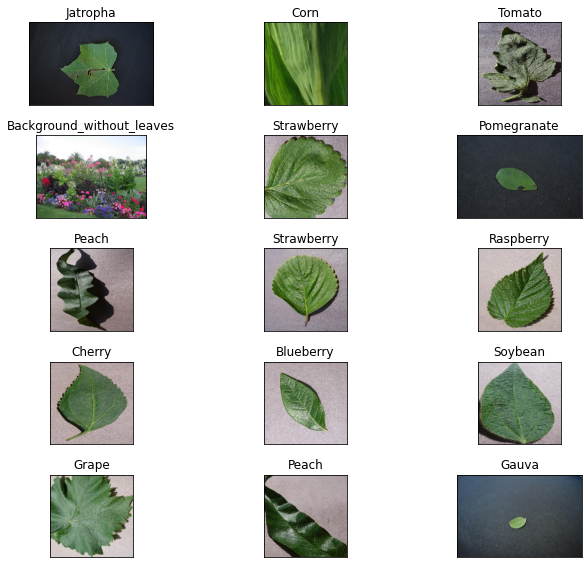

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [24]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 15129 validated image filenames belonging to 26 classes.
Found 15129 validated image filenames belonging to 26 classes.
Found 5043 validated image filenames belonging to 26 classes.


In [26]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94658560/94653016 [==============================] - 8s 0us/step


In [27]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(26, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,
    callbacks=my_callbacks
)

Epoch 1/50
473/473 [==============================] - 4449s 9s/step - loss: 0.6441 - accuracy: 0.8003 - val_loss: 2.7025 - val_accuracy: 0.5316
Epoch 2/50
473/473 [==============================] - 4390s 9s/step - loss: 0.2770 - accuracy: 0.9119 - val_loss: 0.1016 - val_accuracy: 0.8699
Epoch 3/50
397/473 [========================>.....] - ETA: 7:22 - loss: 0.1794 - accuracy: 0.9447

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()


In [ ]:
score,accuracy =model.evaluate(test_gen,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('resnet50_model_final.h5')

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## seeding CNN weights

In [2]:
import pandas as pd
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import random
import pickle
from keras import models, layers, callbacks
import shutil
import cv2
from math import sqrt, floor
from prettytable import PrettyTable

Using TensorFlow backend.
Matplotlib is building the font cache; this may take a moment.


In [26]:
!rm -r output/train/.ipynb_checkpoints
!rm -r output/test/valid/.ipynb_checkpoints
!rm -r output/val/.ipynb_checkpoints


rm: cannot remove ‘output/train/.ipynb_checkpoints’: No such file or directory
rm: cannot remove ‘output/test/valid/.ipynb_checkpoints’: No such file or directory
rm: cannot remove ‘output/val/.ipynb_checkpoints’: No such file or directory


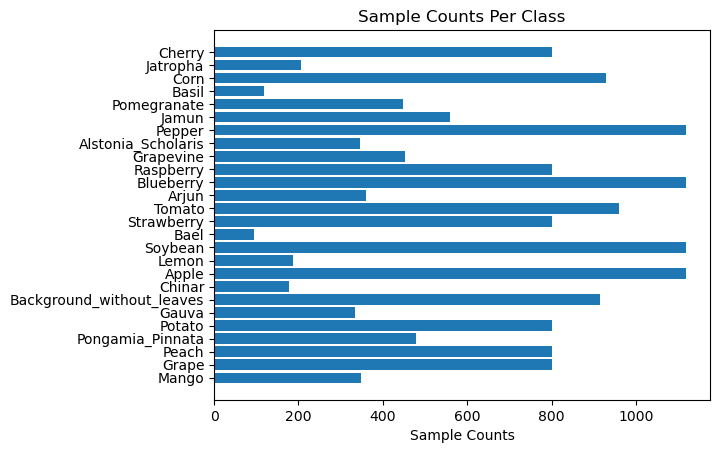

In [27]:
classes= []
sample_counts= []

for f in os.listdir('output/train'):
    train_class_path= os.path.join('output/train', f)
    if os.path.isdir(train_class_path):
        classes.append(f)
        sample_counts.append(len(os.listdir(train_class_path)))

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(classes))

ax.barh(y_pos, sample_counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sample Counts')
ax.set_title('Sample Counts Per Class')

plt.show()

In [20]:
!ls output/train

Alstonia_Scholaris	   Blueberry  Grapevine  Pepper		   Strawberry
Apple			   Cherry     Jamun	 Pomegranate	   Tomato
Arjun			   Chinar     Jatropha	 Pongamia_Pinnata
Background_without_leaves  Corn       Lemon	 Potato
Bael			   Gauva      Mango	 Raspberry
Basil			   Grape      Peach	 Soybean


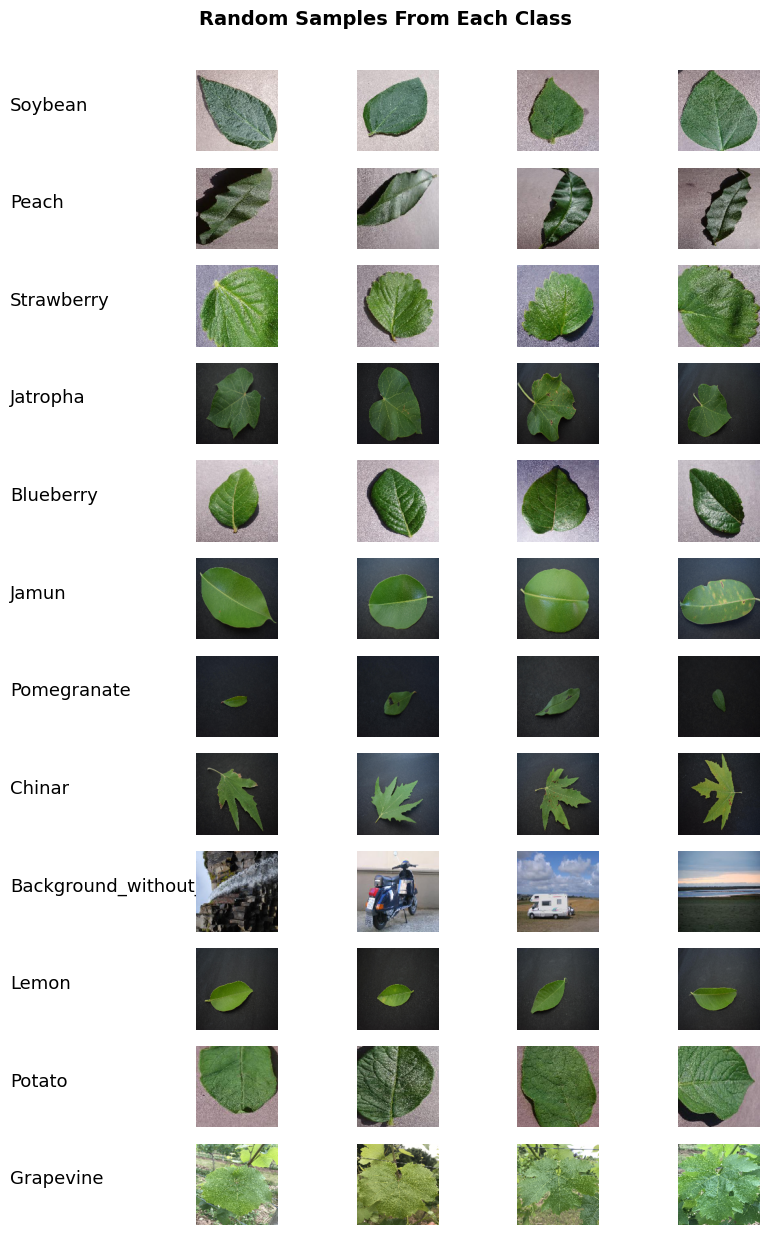

In [5]:
fig= plt.figure(figsize= (10, 15))
fig.suptitle('Random Samples From Each Class', fontsize=14, y=.92, horizontalalignment='center', weight='bold')

columns = 5
rows = 12
for i in range(12):
    sample_class= os.path.join('output/train',classes[i])
    for j in range(1,6):
        fig.add_subplot(rows, columns, i*5+j)
        plt.axis('off')
        if j==1:
            plt.text(0.0, 0.5,str(classes[i]).replace(' ','\n'), fontsize=13, wrap=True)
            continue
        random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
        #from keras.preprocessing.image
        img = image.load_img(random_image, target_size=(150, 150))
        img= image.img_to_array(img)
        img/=255.
        plt.imshow(img)
        
        

plt.show()

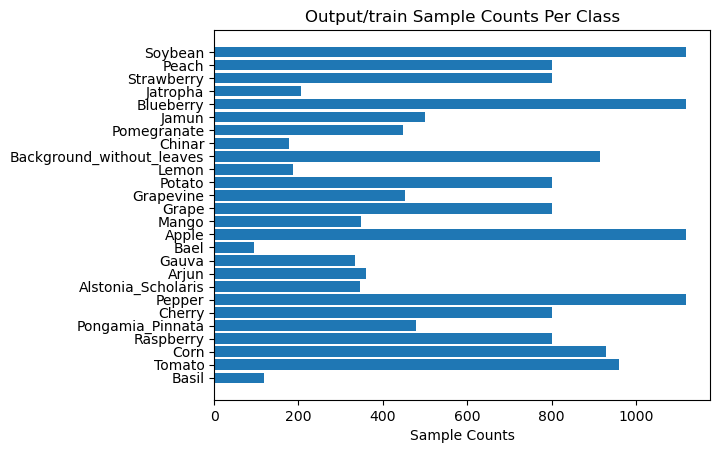

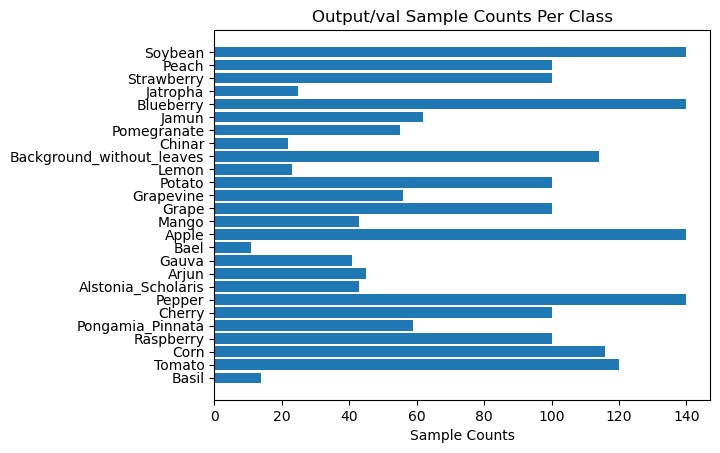

In [10]:
sample_counts= {}

for i, d in enumerate(['output/train', 'output/val']):

    classes= []
    sample_counts[d]= []

    for f in os.listdir(d):
        train_class_path= os.path.join(d, f)
        if os.path.isdir(train_class_path):
            classes.append(f)
            sample_counts[d].append(len(os.listdir(train_class_path)))

    #fig, ax= plt.subplot(221+i)
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(classes))

    ax.barh(y_pos, sample_counts[d], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Sample Counts')
    ax.set_title('{} Sample Counts Per Class'.format(d.capitalize()))

plt.show()

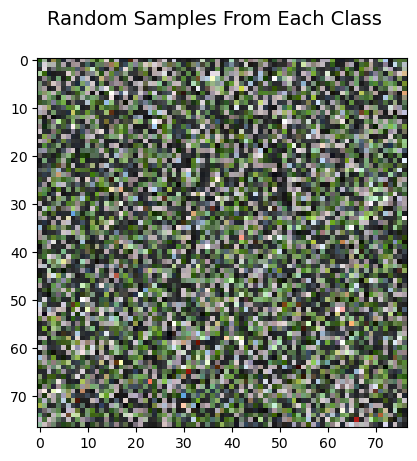

In [13]:
def pull_random_pixels(samples_per_class, pixels_per_sample):
    total_pixels= 12*samples_per_class*pixels_per_sample
    random_pixels= np.zeros((total_pixels, 3), dtype=np.uint8)
    for i in range(12):
        sample_class= os.path.join('output/train',classes[i])
        for j in range(samples_per_class):
            
            random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
            img= cv2.imread(random_image)
            img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=np.reshape(img, (img.shape[0]*img.shape[1], 3))
            new_pixels= img[np.random.randint(0, img.shape[0], pixels_per_sample)]
            
            start_index=pixels_per_sample*(i*samples_per_class+j)
            random_pixels[start_index:start_index+pixels_per_sample,:]= new_pixels

    h= floor(sqrt(total_pixels))
    w= total_pixels//h
    
    random_pixels= random_pixels[np.random.choice(total_pixels, h*w, replace=False)]
    random_pixels= np.reshape(random_pixels, (h, w, 3))
    return random_pixels
    
random_pixels= pull_random_pixels(10, 50)

plt.figure()
plt.suptitle('Random Samples From Each Class', fontsize=14, horizontalalignment='center')
plt.imshow(random_pixels)
plt.show()

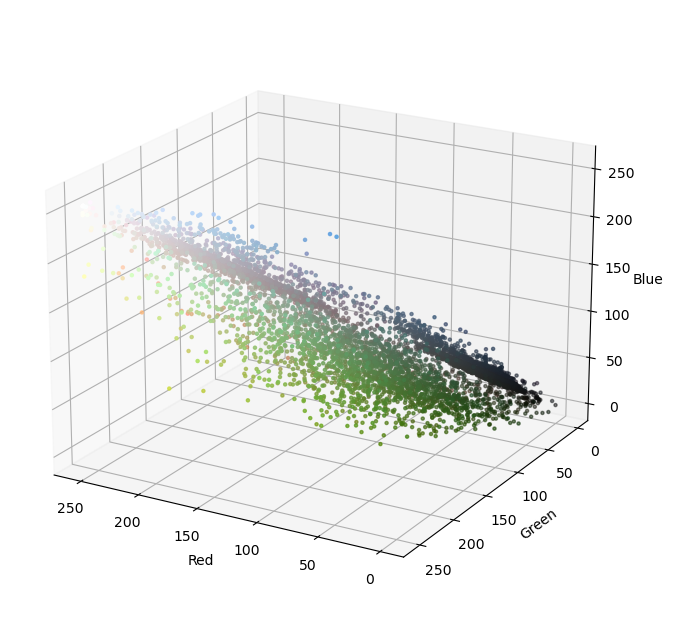

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(20, 120)

pixel_colors = random_pixels.reshape((np.shape(random_pixels)[0]*np.shape(random_pixels)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

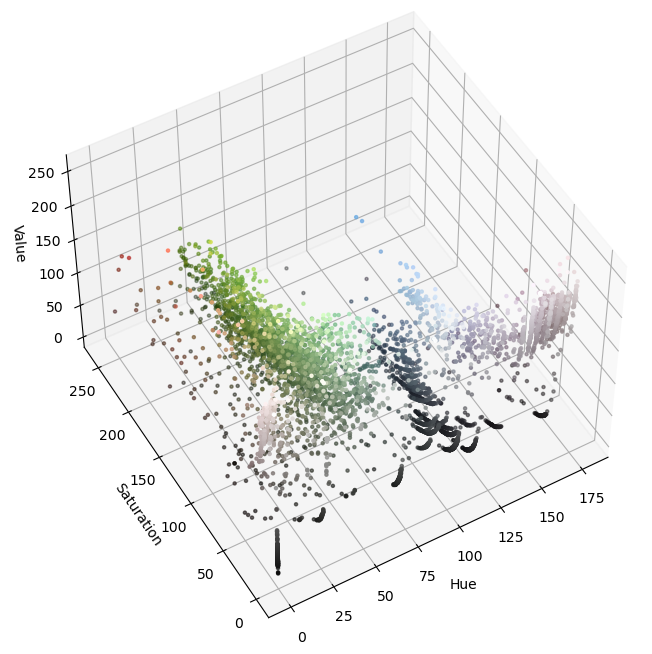

In [15]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(50, 240)



axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

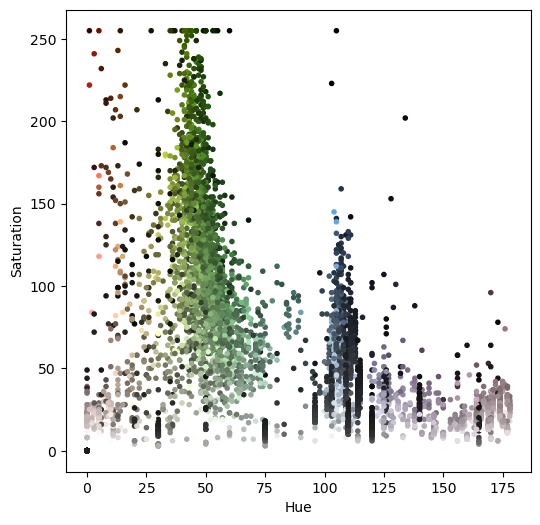

In [16]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(6,6))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(h.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
plt.show()

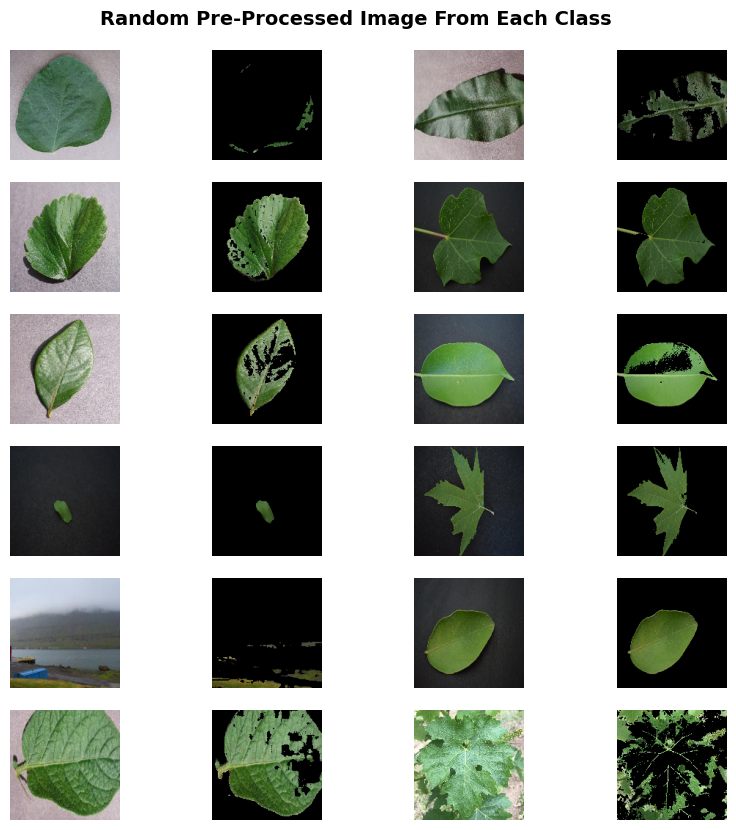

In [17]:
lower_bound= (24, 50, 0)
upper_bound= (55, 255, 255)

fig= plt.figure(figsize=(10, 10))
fig.suptitle('Random Pre-Processed Image From Each Class', fontsize=14, y=.92, horizontalalignment='center', weight='bold')

for i in range(12):
    sample_class=os.path.join('output/train',classes[i])
    random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
    img= cv2.imread(random_image)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, (150, 150))
    
    hsv_img= cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
    result = cv2.bitwise_and(img, img, mask=mask)

    fig.add_subplot(6, 4, i*2+1)
    plt.imshow(img)
    plt.axis('off')    

    fig.add_subplot(6, 4, i*2+2)
    plt.imshow(result)
    plt.axis('off')
    
plt.show()

## Preprocessing

In [28]:
def color_segment_function(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result= result.astype('float64')
    return result

In [29]:
#image function from keras.preprocessing
train_datagen = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.0,
      height_shift_range=0.0,
      shear_range=0.0,
      zoom_range=0.0,
      horizontal_flip=True,
      vertical_flip= True,
    preprocessing_function=color_segment_function,  # function 
      fill_mode='nearest')

test_datagen = image.ImageDataGenerator(rescale=1./255, preprocessing_function=color_segment_function)

In [30]:
train_generator = train_datagen.flow_from_directory(
  'output/train',
  target_size=(224, 224),
  batch_size=20,
  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'output/val',
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(224,224),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 16192 images belonging to 26 classes.
Found 2036 images belonging to 26 classes.
Found 2062 images belonging to 27 classes.


In [31]:
#get class indices and labels. calculate class weight
label_map = {}
for k, v in train_generator.class_indices.items():
    label_map[v]=k

class_counts= pd.Series(train_generator.classes).value_counts()
class_weight= {}

for i, c in class_counts.items():
    class_weight[i]= 1.0/c
    
norm_factor= np.mean(list(class_weight.values()))

for k in class_counts.keys():
    class_weight[k]= class_weight[k]/norm_factor

t = PrettyTable(['class_index', 'class_label', 'class_weight'])
for i in sorted(class_weight.keys()):
    t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
print(t)

+-------------+---------------------------+--------------+
| class_index |        class_label        | class_weight |
+-------------+---------------------------+--------------+
|      0      |     Alstonia_Scholaris    |     1.09     |
|      1      |           Apple           |     0.34     |
|      2      |           Arjun           |     1.04     |
|      3      | Background_without_leaves |     0.41     |
|      4      |            Bael           |     4.01     |
|      5      |           Basil           |     3.19     |
|      6      |         Blueberry         |     0.34     |
|      7      |           Cherry          |     0.47     |
|      8      |           Chinar          |     2.12     |
|      9      |            Corn           |     0.41     |
|      10     |           Gauva           |     1.12     |
|      11     |           Grape           |     0.47     |
|      12     |         Grapevine         |     0.83     |
|      13     |           Jamun           |     0.67    

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))



model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))


model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(26, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)      

In [33]:
best_cb= callbacks.ModelCheckpoint('CNN_model_handled.h5', 
                                         monitor='val_loss', 
                                         verbose=1, 
                                         save_best_only=True, 
                                         save_weights_only=False, 
                                         mode='auto', 
                                         period=1)

opt= keras.optimizers.Adam(lr=0.0005, amsgrad=True)

In [34]:
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit_generator(
                    train_generator,
                    class_weight= class_weight,   # providing class weights
                    steps_per_epoch= 150,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps= 48,
                    verbose=1,
                    use_multiprocessing=True,
                    callbacks= [best_cb])

modr

Epoch 1/25
150/150 [==============================] - 472s 3s/step - loss: 1.7170 - accuracy: 0.1707 - val_loss: 1.9814 - val_accuracy: 0.3375

Epoch 00001: val_loss improved from inf to 1.98138, saving model to CNN_model_handled.h5
Epoch 2/25
150/150 [==============================] - 466s 3s/step - loss: 1.4175 - accuracy: 0.2780 - val_loss: 1.9094 - val_accuracy: 0.4729

Epoch 00002: val_loss improved from 1.98138 to 1.90941, saving model to CNN_model_handled.h5
Epoch 3/25
150/150 [==============================] - 446s 3s/step - loss: 1.2312 - accuracy: 0.3733 - val_loss: 1.6752 - val_accuracy: 0.4540

Epoch 00003: val_loss improved from 1.90941 to 1.67518, saving model to CNN_model_handled.h5
Epoch 4/25
150/150 [==============================] - 445s 3s/step - loss: 1.1455 - accuracy: 0.4143 - val_loss: 1.0723 - val_accuracy: 0.5375

Epoch 00004: val_loss improved from 1.67518 to 1.07229, saving model to CNN_model_handled.h5
Epoch 5/25
150/150 [==============================] - 43

NameError: name 'modr' is not defined

In [35]:
#load best model from training
model_load= models.load_model('CNN_model_handled.h5')

In [ ]:
scores = model.evaluate(test_ds)
scores

In [36]:
#save history
with open('CNN_model_weight_history.pkl', 'wb') as f:
    pickle.dump(history, f)


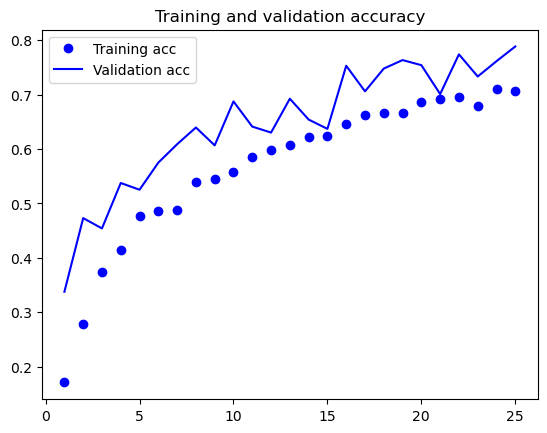

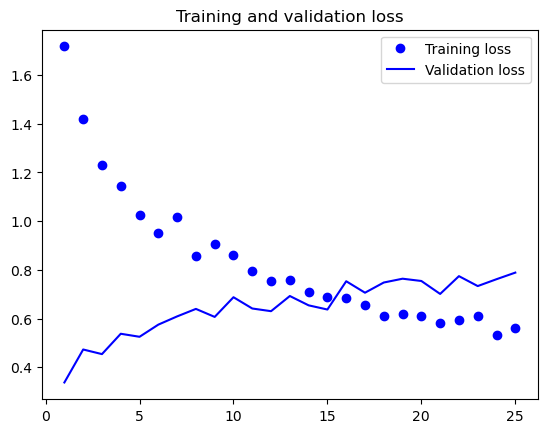

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
pred= model.predict_generator(test_generator, steps= test_generator.n, verbose=1)

2062/2062 [==============================] - 180s 87ms/step


In [40]:
predicted_class_indices=np.argmax(pred,axis=1)

prediction_labels = [label_map[k] for k in predicted_class_indices]
filenames= test_generator.filenames

In [50]:
import numpy as np
from keras.preprocessing import image
import keras



#model = tf.keras.models.load_model('CNN_model_weights.h5')
# predicting images
img = image.load_img("test/Mango.JPG", target_size=(224, 224))


x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=32)
prob = model.predict_proba(images, batch_size= 32)
prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)